<a href="https://colab.research.google.com/github/SHANA941/ICTinternshipp/blob/main/Copy_of_Loan_prediction_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libreries

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importing files

In [25]:
train_data = pd.read_csv("/train_ctrUa4K (2).csv")
test_data = pd.read_csv("/test_lAUu6dG (1).csv")

In [26]:
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [28]:
train_original=train_data.copy()
test_original=test_data.copy()

Checking duplication

In [29]:
test_data.duplicated().sum()


0

In [30]:
train_data.duplicated().sum()

0

Data analysis using plots

<Axes: xlabel='Loan_Status', ylabel='count'>

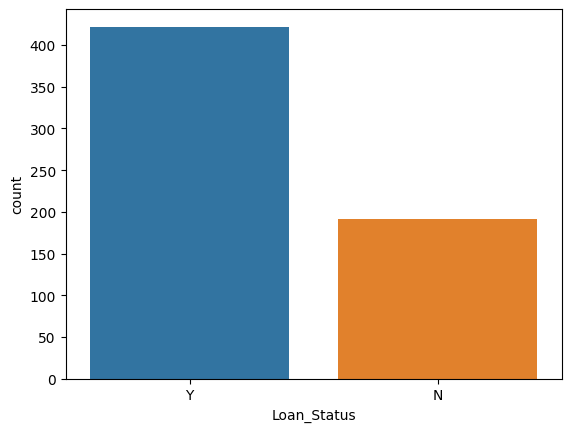

In [31]:
sns.countplot(x = 'Loan_Status', data = train_data)


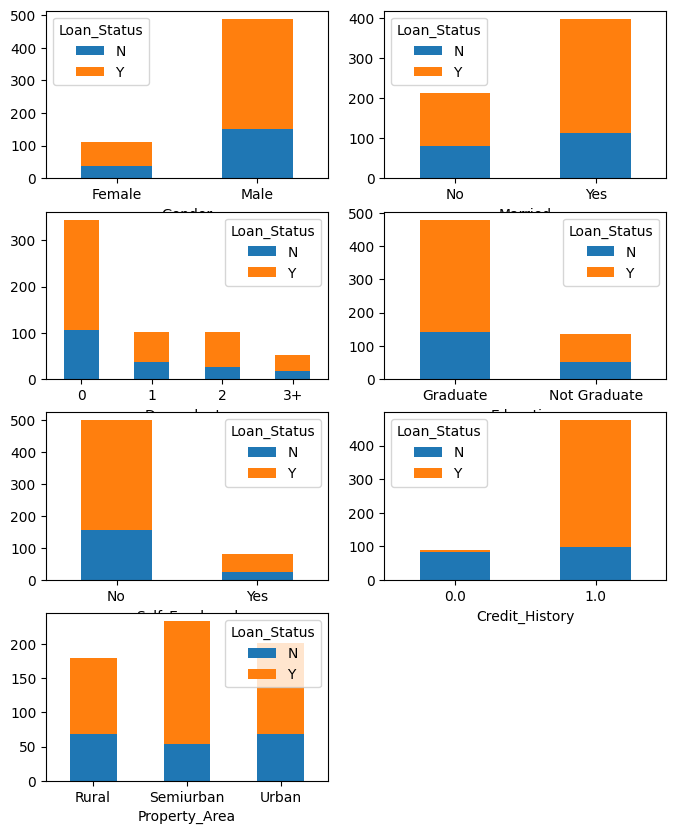

In [32]:
categorical_cols = ['Gender','Married','Dependents','Education', 'Self_Employed','Credit_History','Property_Area']

fig, axes = plt.subplots(4,2, figsize = (8,10))

# row index
i=0
# col index
j=0

for c in categorical_cols:
    pd.crosstab(train_data[c], train_data['Loan_Status']).plot.bar(stacked=True, rot=0, ax=axes[i,j])
    j+=1
    if j > 1:
        i+=1
        j=0

# remove extra empty plot in subplots
fig.delaxes(axes[3][1])

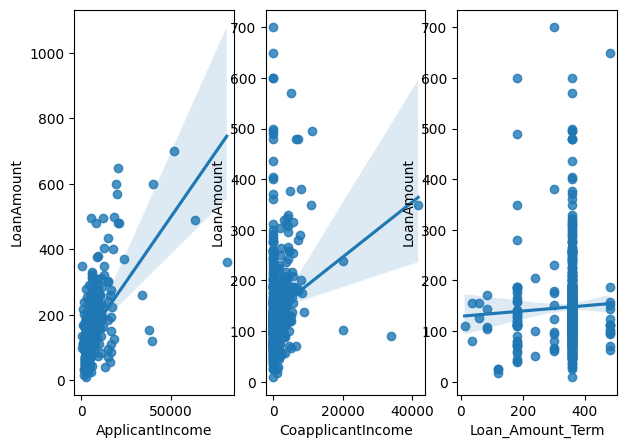

In [33]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
numerical_cols

fig, axes = plt.subplots(1,3, figsize =[7,5])

j = 0

for c in numerical_cols:
    sns.regplot(x = c, y ='LoanAmount', data= train_data, ax = axes[j])
    j+=1

Replacing Categorical values with Binery values

In [34]:
train_data.Gender=train_data.Gender.map({"Female":0,"Male":1})
train_data.Married=train_data.Married.map({"No":0,"Yes":1})
train_data.Self_Employed=train_data.Self_Employed.map({"No":0,"Yes":1})
train_data.Education=train_data.Education.map({"Not":1,"Graduate":0})
train_data.Property_Area=train_data.Property_Area.map({"Urban":0,"Rural":1})
train_data.Loan_Status=train_data.Loan_Status.map({"N":0,"Y":1})
train_data.Dependents=train_data.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [36]:
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,NaN,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1


In [37]:
test_data.Gender=test_data.Gender.map({"Female":0,"Male":1})
test_data.Married=test_data.Married.map({"No":0,"Yes":1})
test_data.Self_Employed=test_data.Self_Employed.map({"No":0,"Yes":1})
test_data.Education=test_data.Education.map({"Not":1,"Graduate":0})
test_data.Property_Area=test_data.Property_Area.map({"Urban":0,"Rural":1})
test_data.Dependents=test_data.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [38]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,0.0,0.0,5720,0,110.0,360.0,1.0,0.0
1,LP001022,1.0,1,1.0,0.0,0.0,3076,1500,126.0,360.0,1.0,0.0
2,LP001031,1.0,1,2.0,0.0,0.0,5000,1800,208.0,360.0,1.0,0.0
3,LP001035,1.0,1,2.0,0.0,0.0,2340,2546,100.0,360.0,NaN,0.0
4,LP001051,1.0,0,0.0,NaN,0.0,3276,0,78.0,360.0,1.0,0.0


Filling missing Values

In [39]:
train_data["Gender"].fillna(train_data["Gender"].mode()[0],inplace=True)
train_data["Married"].fillna(train_data["Married"].mode()[0],inplace=True)
train_data["Dependents"].fillna(train_data["Dependents"].mode()[0],inplace=True)
train_data["Self_Employed"].fillna(train_data["Self_Employed"].mode()[0],inplace=True)
train_data["Credit_History"].fillna(train_data["Credit_History"].mode()[0],inplace=True)
train_data["Education"].fillna(train_data["Education"].mode()[0],inplace=True)
train_data["Property_Area"].fillna(train_data["Property_Area"].mode()[0],inplace=True)


In [40]:
train_data["Loan_Amount_Term"].fillna(train_data["Loan_Amount_Term"].mode()[0],inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].median(),inplace=True)
train_data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1


In [42]:
test_data["Gender"].fillna(test_data["Gender"].mode()[0],inplace=True)
test_data["Married"].fillna(test_data["Married"].mode()[0],inplace=True)
test_data["Dependents"].fillna(test_data["Dependents"].mode()[0],inplace=True)
test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0],inplace=True)
test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0],inplace=True)
test_data["Education"].fillna(test_data["Education"].mode()[0],inplace=True)
test_data["Property_Area"].fillna(test_data["Property_Area"].mode()[0],inplace=True)

In [43]:
test_data["Loan_Amount_Term"].value_counts()
test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mode()[0],inplace=True)
test_data["LoanAmount"].fillna(test_data["LoanAmount"].median(),inplace=True)
test_data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [44]:
test_data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [45]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,0.0,0.0,5720,0,110.0,360.0,1.0,0.0
1,LP001022,1.0,1,1.0,0.0,0.0,3076,1500,126.0,360.0,1.0,0.0
2,LP001031,1.0,1,2.0,0.0,0.0,5000,1800,208.0,360.0,1.0,0.0
3,LP001035,1.0,1,2.0,0.0,0.0,2340,2546,100.0,360.0,1.0,0.0
4,LP001051,1.0,0,0.0,0.0,0.0,3276,0,78.0,360.0,1.0,0.0


Feature Calculation

In [46]:
train_data['Total_Income']=train_data["ApplicantIncome"]+train_data['CoapplicantIncome']
test_data['Total_Income']=test_data["ApplicantIncome"]+test_data['CoapplicantIncome']

In [47]:
train_data['Total_Income_log']=np.log(train_data["Total_Income"])
test_data['Total_Income_log']=np.log(test_data["Total_Income"])

In [48]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,0.0,1,5849.0,8.674026
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0,6091.0,8.714568
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1,3000.0,8.006368
3,LP001006,1.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1,4941.0,8.505323
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1,6000.0,8.699515


Dropping Unnecessory variables

In [49]:
train_data=train_data.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","Loan_Amount_Term"],axis=1)
train_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log
0,1.0,0.0,0.0,0.0,0.0,128.0,1.0,0.0,1,5849.0,8.674026
1,1.0,1.0,1.0,0.0,0.0,128.0,1.0,1.0,0,6091.0,8.714568
2,1.0,1.0,0.0,0.0,1.0,66.0,1.0,0.0,1,3000.0,8.006368
3,1.0,1.0,0.0,0.0,0.0,120.0,1.0,0.0,1,4941.0,8.505323
4,1.0,0.0,0.0,0.0,0.0,141.0,1.0,0.0,1,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,71.0,1.0,1.0,1,2900.0,7.972466
610,1.0,1.0,3.0,0.0,0.0,40.0,1.0,1.0,1,4106.0,8.320205
611,1.0,1.0,1.0,0.0,0.0,253.0,1.0,0.0,1,8312.0,9.025456
612,1.0,1.0,2.0,0.0,0.0,187.0,1.0,0.0,1,7583.0,8.933664


In [50]:
test_data=test_data.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","Loan_Amount_Term",],axis=1)
test_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Total_Income,Total_Income_log
0,1.0,1,0.0,0.0,0.0,110.0,1.0,0.0,5720,8.651724
1,1.0,1,1.0,0.0,0.0,126.0,1.0,0.0,4576,8.428581
2,1.0,1,2.0,0.0,0.0,208.0,1.0,0.0,6800,8.824678
3,1.0,1,2.0,0.0,0.0,100.0,1.0,0.0,4886,8.494129
4,1.0,0,0.0,0.0,0.0,78.0,1.0,0.0,3276,8.094378
...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3.0,0.0,1.0,113.0,1.0,0.0,5786,8.663196
363,1.0,1,0.0,0.0,0.0,115.0,1.0,0.0,4867,8.490233
364,1.0,0,0.0,0.0,0.0,126.0,1.0,0.0,5243,8.564649
365,1.0,1,0.0,0.0,0.0,158.0,1.0,1.0,7393,8.908289


**Logical Regression**

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
x=train_data.drop("Loan_Status",1)
y=train_data.Loan_Status

<ipython-input-52-8924da1e2375>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=train_data.drop("Loan_Status",1)


In [53]:
x=pd.get_dummies(x)
train_data=pd.get_dummies(train_data)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [55]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(x_train,y_train)
pred_l=logmodel.predict(x_test)
acc_l=accuracy_score(y_test,pred_l)*100
acc_l

83.24324324324324

In [56]:
pred_test=logmodel.predict(test_data)


Creating Sample file

In [57]:
loancsv=pd.DataFrame({"Loan_ID":test_original["Loan_ID"],"Loan_Status":pred_test})

In [58]:
loancsv

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


Replacing the binery values

In [59]:
loancsv["Loan_Status"].replace(0,"N",inplace=True)
loancsv["Loan_Status"].replace(1,"Y",inplace=True)
loancsv


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


Saving the sample file as csv


In [61]:
loancsv.to_csv("sample_submission.csv",index=False)
